In [1]:
from _utils import *

folder_path = '/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/'
    
num_monomers = 80

# Load polys data and then perform linear interpolation
# List all .mat files in the folder and load them
cnc_polys = scipy.io.loadmat(folder_path + 'cncPols.mat')['cncPols'][:num_monomers, :, :]
esc_polys = scipy.io.loadmat(folder_path + 'escPols.mat')['escPols'][:num_monomers, :, :]

esc_polys_interp = interpolate_polymers(esc_polys)
cnc_polys_interp = interpolate_polymers(cnc_polys)

esc_maps_interp = np.array([squareform(pdist(esc_polys_interp[:80, :, i])) for i in range(esc_polys_interp.shape[2])])
cnc_maps_interp = np.array([squareform(pdist(cnc_polys_interp[:80, :, i])) for i in range(cnc_polys_interp.shape[2])])
esc_maps_interp_flat = np.array([x.flatten() for x in esc_maps_interp])
cnc_maps_interp_flat = np.array([x.flatten() for x in cnc_maps_interp])
all_maps_interp = np.concatenate((esc_maps_interp, cnc_maps_interp), axis=0)
all_maps_interp_flat = np.concatenate((esc_maps_interp_flat, cnc_maps_interp_flat), axis=0)


2024-09-17 19:24:49.830510: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-17 19:24:49.913579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.decomposition import NMF
# NMF projection does not seem to by physical 

In [3]:
n_components = 500

In [4]:
nmf = NMF(n_components=n_components, verbose=2)
nmf.fit(all_maps_interp_flat)
W_esc, H_esc = nmf.transform(esc_maps_interp_flat), nmf.components_
W_cnc, H_cnc = nmf.transform(cnc_maps_interp_flat), nmf.components_

violation: 1.0
violation: 7.31528557996035e-08
Converged at iteration 3
violation: 1.0
violation: 0.6832706216781498
violation: 0.4373895059486988
violation: 0.3517593051869059
violation: 0.31355208662596157
violation: 0.30277910737290403
violation: 0.2983125891643659
violation: 0.3047519059198601
violation: 0.3059468562394589
violation: 0.30822156733827255
violation: 0.3092380539505533
violation: 0.3085533080187094
violation: 0.30719282518820246
violation: 0.3023171867835425
violation: 0.29227649889388047
violation: 0.280272322977138
violation: 0.26914395741268526
violation: 0.2590864817741712
violation: 0.25079357263814905
violation: 0.24386626078972837
violation: 0.23889805673727366
violation: 0.23292563116613055
violation: 0.2255366646927172
violation: 0.21763601534235433
violation: 0.2095671198782133
violation: 0.2033075962533045
violation: 0.19883656913823552
violation: 0.19540743192652477
violation: 0.1911009175937565
violation: 0.18529014002743402
violation: 0.1787690862103284


/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


violation: 1.0
violation: 0.7853601901107004
violation: 0.5372117331918715
violation: 0.4371044125337818
violation: 0.40219473241621756
violation: 0.39342974999913755
violation: 0.4005307612532255
violation: 0.4118126604224617
violation: 0.4121531585435448
violation: 0.4138881957417134
violation: 0.41276721674926353
violation: 0.41000312054553334
violation: 0.400584071289941
violation: 0.38922442873246854
violation: 0.37432644332873566
violation: 0.35874394202671944
violation: 0.34450256740481566
violation: 0.3319090939078241
violation: 0.31994955622393334
violation: 0.30998641436038726
violation: 0.30404498412545333
violation: 0.2967103367790285
violation: 0.2877311640536291
violation: 0.27862179522940594
violation: 0.26744924626811467
violation: 0.25711388080190506
violation: 0.24828856844046238
violation: 0.24142937995099822
violation: 0.23844462886483592
violation: 0.23184858943835585
violation: 0.22340871533138315
violation: 0.20641186707558518
violation: 0.1866134104687517
violat

/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [5]:
nmf.reconstruction_err_

1095950.8150925133

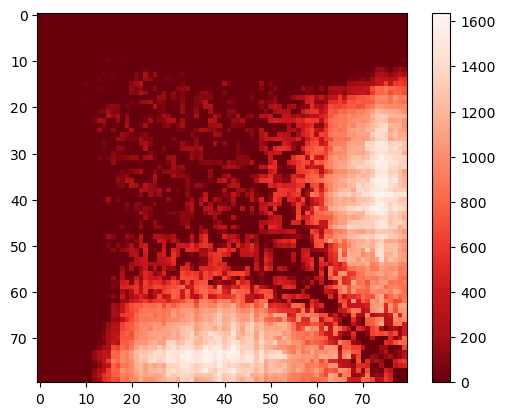

In [6]:
plt.imshow(H_esc[2, :].reshape(80, 80), cmap='Reds_r')
plt.colorbar()

In [7]:
H_esc.shape

(500, 6400)